In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

# Definir los ETFs y su peso en el portafolio

In [ ]:
etfs = {
    "VOO": 0.30,   # S&P 500
    "VUG": 0.10,   # Growth stocks
    "VTWO": 0.10,  # Small caps
    "VNQ": 0.10,   # U.S. Real Estate
    "VNQI": 0.05,  # Global Real Estate
    "BNDX": 0.05,  # International Bonds
    "BND": 0.05,   # U.S. Bonds
    "VWO": 0.15,   # Emerging Markets
    "VSS": 0.05,   # Small-Cap Intl.
    "ESGV": 0.05   # ESG Leaders
}


# Rango de tiempo para la simulación

In [9]:
start_date = "2015-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Descargar los precios de cierre ajustados

In [26]:
data = yf.download(list(etfs.keys()), start=start_date, end=end_date)
data = data["Close"]  # O también: data.xs("Close", level=0, axis=1)


[*********************100%***********************]  9 of 9 completed


# Calcular los retornos diarios

In [27]:
returns = data.pct_change().dropna()

# Simular la rentabilidad del portafolio

In [28]:
# Filtrar los retornos para que solo incluyan los ETFs disponibles en data
valid_tickers = list(set(returns.columns) & set(etfs.keys()))  # Solo ETFs con datos
print(valid_tickers)
filtered_returns = returns[valid_tickers]  # Filtrar retornos
filtered_weights = np.array([etfs[ticker] for ticker in valid_tickers])  # Ajustar pesos

# Calcular retornos del portafolio solo con los ETFs disponibles
portfolio_returns = (filtered_returns * filtered_weights).sum(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod()

['VTWO', 'BND', 'VSS', 'VNQ', 'VUG', 'VWO', 'VNQI', 'VOO', 'BNDX']


# Calcular métricas clave

In [29]:
annualized_return = portfolio_returns.mean() * 252  # 252 días de mercado al año
annualized_volatility = portfolio_returns.std() * np.sqrt(252)
max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()

# Mostrar gráfico de evolución del portafolio

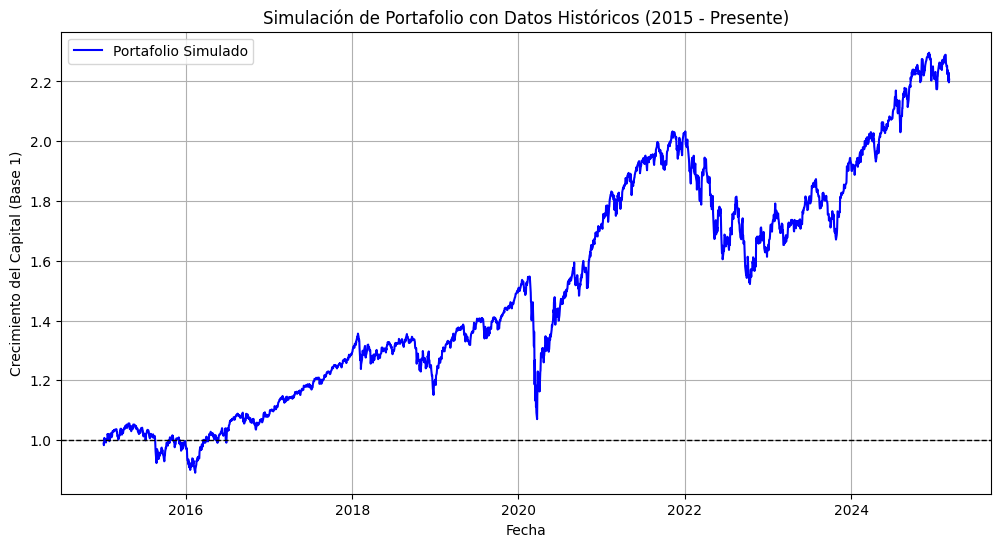

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label="Portafolio Simulado", color="blue")
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
plt.title("Simulación de Portafolio con Datos Históricos (2015 - Presente)")
plt.xlabel("Fecha")
plt.ylabel("Crecimiento del Capital (Base 1)")
plt.legend()
plt.grid()
plt.show()

In [31]:
print(f"Rentabilidad Anualizada: {annualized_return:.2%}")
print(f"Volatilidad Anualizada: {annualized_volatility:.2%}")
print(f"Máximo Drawdown: {max_drawdown:.2%}")

Rentabilidad Anualizada: 8.89%
Volatilidad Anualizada: 14.80%
Máximo Drawdown: -30.84%
